In [27]:
import math
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
style.use('ggplot')
maruti = pdr.get_data_yahoo('MARUTI.NS', start = '2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [28]:
maruti.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1565.0,1586.699951,1546.150024,1551.449951,1407.334717,534231
2010-01-05,1563.5,1567.550049,1510.000000,1515.849976,1375.041626,1407407
2010-01-06,1518.0,1522.800049,1460.000000,1461.650024,1325.876465,1571353
2010-01-07,1468.0,1485.000000,1450.000000,1453.300049,1318.302246,901165
2010-01-08,1459.0,1463.800049,1421.099976,1433.150024,1300.023804,1294429


In [29]:
time_elapsed = (maruti.index[-1]-maruti.index[0]).days
print(time_elapsed)

4565


In [30]:
Agg_growth = (maruti['Adj Close'][-1]/maruti['Adj Close'][1]) #total growth
year_equi = time_elapsed / 365
CAGR = (Agg_growth**(1/year_equi))-1
std_dev = maruti['Adj Close'].pct_change().std()
trd_days = 252
std_dev_scaled = std_dev * math.sqrt(trd_days)

print(f"CAGR(Mean Annual Returns): {round(CAGR,3)}")
print(f"Standard deviation: {round(std_dev_scaled,3)}")

CAGR(Mean Annual Returns): 0.155
Standard deviation: 0.296


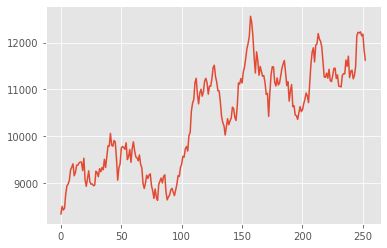

In [34]:
daily_return_rand = np.random.normal(CAGR/trd_days,std_dev,trd_days)+1

price_series = [maruti['Adj Close'][-1]]
for j in daily_return_rand:
    price_series.append(price_series[-1]*j)
    
plt.plot(price_series)
plt.show()

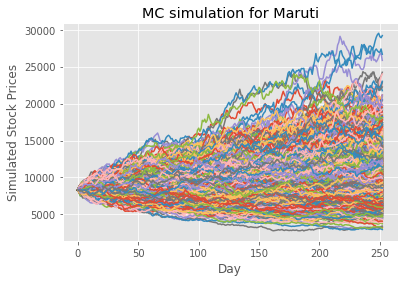

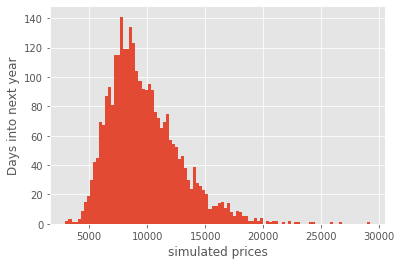

In [32]:
#above is a single random walk, generating large number of times
trials = 3000
closing_prices = []

for i in range(trials):
    daily_return_rand = np.random.normal(CAGR/trd_days,std_dev,trd_days)+1

    price_series = [maruti['Adj Close'][-1]]
    for j in daily_return_rand:
        price_series.append(price_series[-1]*j)
    closing_prices.append(price_series[-1])
    
    plt.plot(price_series)
    plt.title('MC simulation for Maruti')
    plt.xlabel("Day")
    plt.ylabel("Simulated Stock Prices")
    
plt.show()

#histogram
plt.hist(closing_prices, bins = 100)
plt.xlabel("simulated prices")
plt.ylabel("Days into next year")
plt.show()
    

In [33]:
#calculating mean closing price
mean_close_price = round(np.mean(closing_prices),3)
print(f"Expected price {mean_close_price}")

Expected price 9741.689
